In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/classification_of_brain_tumour/pytorch/default/1/classification (1).pth
/kaggle/input/brain-tumor-dataset-segmentation-and-classification/DATASET/Segmentation/Pituitary tumor/enh_1751.png
/kaggle/input/brain-tumor-dataset-segmentation-and-classification/DATASET/Segmentation/Pituitary tumor/enh_1067.png
/kaggle/input/brain-tumor-dataset-segmentation-and-classification/DATASET/Segmentation/Pituitary tumor/enh_1719_mask.png
/kaggle/input/brain-tumor-dataset-segmentation-and-classification/DATASET/Segmentation/Pituitary tumor/enh_1203.png
/kaggle/input/brain-tumor-dataset-segmentation-and-classification/DATASET/Segmentation/Pituitary tumor/enh_1481_mask.png
/kaggle/input/brain-tumor-dataset-segmentation-and-classification/DATASET/Segmentation/Pituitary tumor/enh_1322.png
/kaggle/input/brain-tumor-dataset-segmentation-and-classification/DATASET/Segmentation/Pituitary tumor/enh_1447_mask.png
/kaggle/input/brain-tumor-dataset-segmentation-and-classification/DATASET/Segmentation/

In [2]:
# Core PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Data handling
from torch.utils.data import Dataset, DataLoader

# Image processing
from torchvision import transforms
from PIL import Image
import numpy as np
import cv2  

# Visualization
import matplotlib.pyplot as plt


import os
from glob import glob

# Optional: For tqdm progress bars during training
from tqdm import tqdm


In [3]:
#classification

import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import numpy as  np
import os as os



from torchvision import transforms

data_transforms = transforms.Compose([
    transforms.Resize(256),                  
    transforms.CenterCrop(224),              
  
    transforms.ToTensor(),                   
    transforms.Normalize(                    
        mean=[0.485, 0.456, 0.406],           
        std=[0.229, 0.224, 0.225]            
    )
])


train_data = datasets.ImageFolder('/kaggle/input/brain-tumor-dataset-segmentation-and-classification/DATASET/classification/Training', transform = data_transforms)
train_data_loader = DataLoader(
   train_data, batch_size = 16,shuffle = True
    
)

test_data = datasets.ImageFolder('/kaggle/input/brain-tumor-dataset-segmentation-and-classification/DATASET/classification/Testing', transform = data_transforms)
test_data_loader = DataLoader(
   test_data, batch_size = 16,shuffle = True
    
)



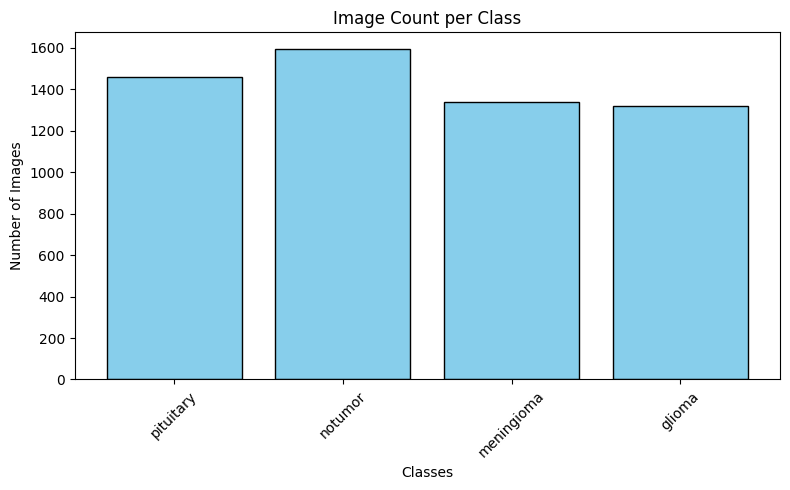

In [4]:
import os
import matplotlib.pyplot as plt

def plot_class_distribution(data_dir):

    
    class_counts = {}
    
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            num_images = len([
                f for f in os.listdir(class_path)
                if f.lower().endswith(('.png', '.jpg', '.jpeg'))
            ])
            class_counts[class_name] = num_images

   
    plt.figure(figsize=(8, 5))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue', edgecolor='black')
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.title("Image Count per Class")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_class_distribution("/kaggle/input/brain-tumor-dataset-segmentation-and-classification/DATASET/classification/Training")




Using device: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 157MB/s]
Epoch 1/20 [Val]: 100%|██████████| 82/82 [00:11<00:00,  7.09it/s]


Epoch 1/20 | Train Loss: 0.2378 | Val Loss: 0.0739 | Val Acc: 0.9771


Epoch 2/20 [Val]: 100%|██████████| 82/82 [00:07<00:00, 11.41it/s]


Epoch 2/20 | Train Loss: 0.0657 | Val Loss: 0.0461 | Val Acc: 0.9847


Epoch 3/20 [Val]: 100%|██████████| 82/82 [00:07<00:00, 11.45it/s]


Epoch 3/20 | Train Loss: 0.0331 | Val Loss: 0.0427 | Val Acc: 0.9893


Epoch 4/20 [Val]: 100%|██████████| 82/82 [00:07<00:00, 11.32it/s]


Epoch 4/20 | Train Loss: 0.0278 | Val Loss: 0.0885 | Val Acc: 0.9741


Epoch 5/20 [Val]: 100%|██████████| 82/82 [00:07<00:00, 11.35it/s]


Epoch 5/20 | Train Loss: 0.0193 | Val Loss: 0.0525 | Val Acc: 0.9825


Epoch 6/20 [Val]: 100%|██████████| 82/82 [00:07<00:00, 11.47it/s]


Epoch 6/20 | Train Loss: 0.0227 | Val Loss: 0.0875 | Val Acc: 0.9680


Epoch 7/20 [Val]: 100%|██████████| 82/82 [00:07<00:00, 11.42it/s]


Epoch 7/20 | Train Loss: 0.0202 | Val Loss: 0.0475 | Val Acc: 0.9870


Epoch 8/20 [Val]: 100%|██████████| 82/82 [00:07<00:00, 11.09it/s]


Epoch 8/20 | Train Loss: 0.0123 | Val Loss: 0.0578 | Val Acc: 0.9825


Epoch 9/20 [Val]: 100%|██████████| 82/82 [00:07<00:00, 11.41it/s]


Epoch 9/20 | Train Loss: 0.0113 | Val Loss: 0.0209 | Val Acc: 0.9947


Epoch 10/20 [Val]: 100%|██████████| 82/82 [00:07<00:00, 11.24it/s]


Epoch 10/20 | Train Loss: 0.0110 | Val Loss: 0.0219 | Val Acc: 0.9962


Epoch 11/20 [Val]: 100%|██████████| 82/82 [00:07<00:00, 11.30it/s]


Epoch 11/20 | Train Loss: 0.0061 | Val Loss: 0.0952 | Val Acc: 0.9733


Epoch 12/20 [Val]: 100%|██████████| 82/82 [00:07<00:00, 11.41it/s]


Epoch 12/20 | Train Loss: 0.0252 | Val Loss: 0.0629 | Val Acc: 0.9809


Epoch 13/20 [Val]: 100%|██████████| 82/82 [00:07<00:00, 11.23it/s]


Epoch 13/20 | Train Loss: 0.0123 | Val Loss: 0.0360 | Val Acc: 0.9878


Epoch 14/20 [Val]: 100%|██████████| 82/82 [00:07<00:00, 11.46it/s]


Epoch 14/20 | Train Loss: 0.0109 | Val Loss: 0.0211 | Val Acc: 0.9939


Epoch 15/20 [Val]: 100%|██████████| 82/82 [00:07<00:00, 11.19it/s]


Epoch 15/20 | Train Loss: 0.0033 | Val Loss: 0.0288 | Val Acc: 0.9924


Epoch 16/20 [Val]: 100%|██████████| 82/82 [00:07<00:00, 11.35it/s]


Epoch 16/20 | Train Loss: 0.0085 | Val Loss: 0.1073 | Val Acc: 0.9733


Epoch 17/20 [Val]: 100%|██████████| 82/82 [00:07<00:00, 11.58it/s]


Epoch 17/20 | Train Loss: 0.0150 | Val Loss: 0.0317 | Val Acc: 0.9916


Epoch 18/20 [Val]: 100%|██████████| 82/82 [00:07<00:00, 11.44it/s]


Epoch 18/20 | Train Loss: 0.0030 | Val Loss: 0.0396 | Val Acc: 0.9886


Epoch 19/20 [Val]: 100%|██████████| 82/82 [00:07<00:00, 11.49it/s]


Epoch 19/20 | Train Loss: 0.0044 | Val Loss: 0.0874 | Val Acc: 0.9741


Epoch 20/20 [Val]: 100%|██████████| 82/82 [00:07<00:00, 11.11it/s]


Epoch 20/20 | Train Loss: 0.0164 | Val Loss: 0.0300 | Val Acc: 0.9908


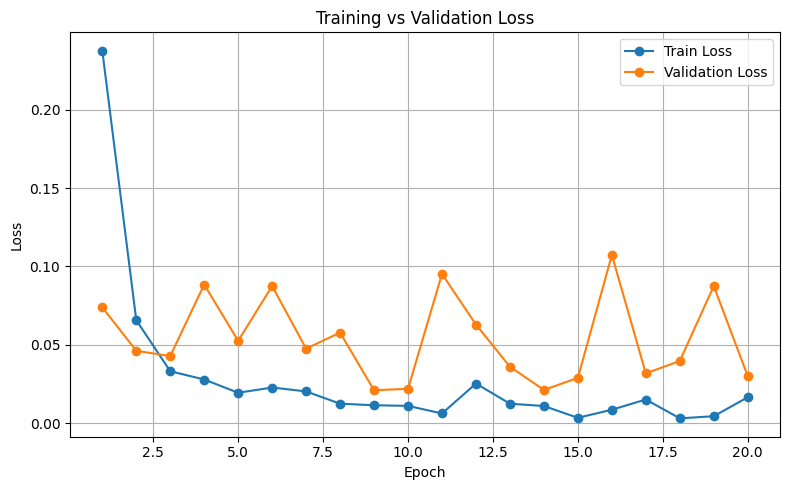

Extracting embeddings: 100%|██████████| 82/82 [00:07<00:00, 11.05it/s]

Train embeddings shape: (5712, 512)
Validation embeddings shape: (1311, 512)


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import xgboost as xgb

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


resnet = models.resnet18(pretrained=True)
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, len(train_data.classes))  # temporary head
resnet = resnet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=1e-4)

epochs = 20
train_losses, val_losses = [], []


for epoch in range(epochs):

    resnet.train()
    total_train_loss = 0
    for images, labels in tqdm(train_data_loader, desc=f"Epoch {epoch+1}/{epochs} [Train]"):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_data_loader)
    train_losses.append(avg_train_loss)

   
    resnet.eval()
    total_val_loss = 0
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in tqdm(test_data_loader, desc=f"Epoch {epoch+1}/{epochs} [Val]"):
            images, labels = images.to(device), labels.to(device)
            outputs = resnet(images)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(test_data_loader)
    val_acc = correct / total
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {avg_train_loss:.4f} | "
          f"Val Loss: {avg_val_loss:.4f} | Val Acc: {val_acc:.4f}")


plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), train_losses, marker='o', label='Train Loss')
plt.plot(range(1, epochs + 1), val_losses, marker='o', label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


resnet.eval()
feature_extractor = nn.Sequential(*list(resnet.children())[:-1])  # remove fc layer

def get_embeddings(dataloader):
    all_features, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in tqdm(dataloader, desc="Extracting embeddings"):
            imgs = imgs.to(device)
            feats = feature_extractor(imgs).squeeze()  # [batch, 512, 1, 1] → [batch, 512]
            all_features.append(feats.cpu().numpy())
            all_labels.append(labels.numpy())
    return np.concatenate(all_features), np.concatenate(all_labels)

X_train, y_train = get_embeddings(train_data_loader)
X_val, y_val = get_embeddings(test_data_loader)

print(f"Train embeddings shape: {X_train.shape}")
print(f"Validation embeddings shape: {X_val.shape}")


In [6]:

# xgb_clf = xgb.XGBClassifier(
#     n_estimators=50,
#     learning_rate=0.05,
#     max_depth=4,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     tree_method="hist",
#     random_state=42
# )

# xgb_clf.fit(X_train, y_train)


# y_pred = xgb_clf.predict(X_val)
# acc = accuracy_score(y_val, y_pred)
# print(f"Validation Accuracy (XGBoost on embeddings): {acc:.4f}")



In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


log_reg = LogisticRegression(
    max_iter=2000,         
    solver='lbfgs',        
    C=1.0,                  
    n_jobs=-1,              
    random_state=42
)


log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy (Logistic Regression on embeddings): {acc:.4f}")


Validation Accuracy (Logistic Regression on embeddings): 0.9924


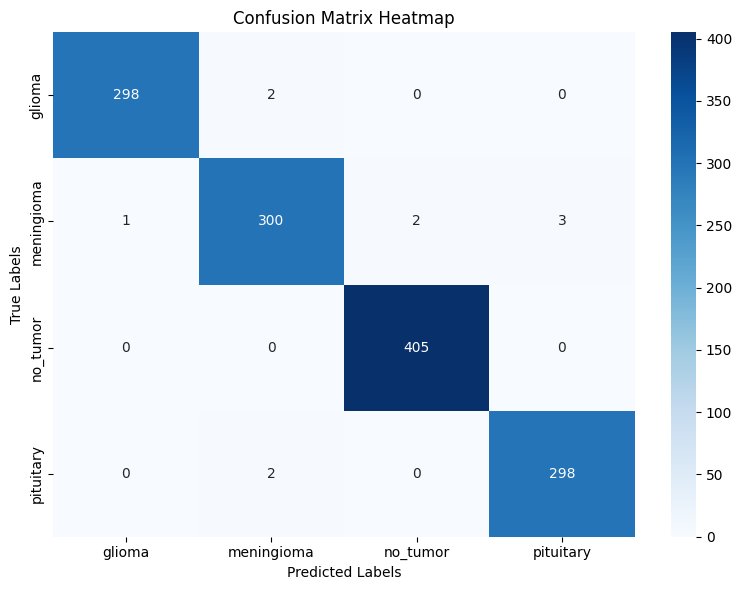

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


cm = confusion_matrix(y_val, y_pred)
class_names = ["glioma", "meningioma", "no_tumor", "pituitary"]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()


In [9]:
!pip install grad-cam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.7 MB/s

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import cv2
import torch

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

In [11]:
from PIL import Image
import numpy as np
import cv2

def get_edge_for_visualization(pil_img):
 
    w, h = pil_img.size
    scale = 256 / min(w, h)
    new_w, new_h = int(w * scale), int(h * scale)
    resized = pil_img.resize((new_w, new_h), Image.BILINEAR)


    left = (resized.width - 224) // 2
    top = (resized.height - 224) // 2
    cropped = resized.crop((left, top, left + 224, top + 224))

    gray = cv2.cvtColor(np.array(cropped), cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = 255 - cv2.Canny(blurred, 30, 80)

    
    edge_rgb = np.stack([edges]*3, axis=-1).astype(np.float32) / 255.0

    return edge_rgb


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


 Predicted Class: glioma


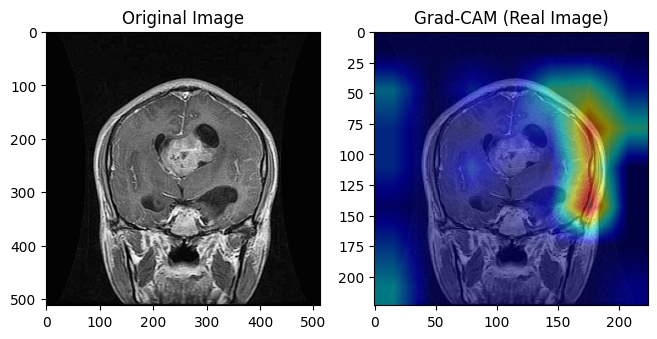

In [12]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


data_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


model = models.resnet18(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, 4)
model.load_state_dict(torch.load("/kaggle/input/classification_of_brain_tumour/pytorch/default/1/classification (1).pth", map_location=device))
model.to(device)
model.eval()


class_names = ['glioma', 'meningioma', 'no_tumor', 'pituitary']


def get_edge_for_visualization(pil_img):
    w, h = pil_img.size
    scale = 256 / min(w, h)
    new_w, new_h = int(w * scale), int(h * scale)
    resized = pil_img.resize((new_w, new_h), Image.BILINEAR)
    
    left = (resized.width - 224) // 2
    top = (resized.height - 224) // 2
    cropped = resized.crop((left, top, left + 224, top + 224))
    
    gray = cv2.cvtColor(np.array(cropped), cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = 255 - cv2.Canny(blurred, 30, 80)
    
    edge_rgb = np.stack([edges]*3, axis=-1).astype(np.float32) / 255.0
    return edge_rgb


def predict_and_visualize(image_path):
    image = Image.open(image_path).convert("RGB")
    input_tensor = data_transforms(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        pred_idx = torch.argmax(output, dim=1).item()
        pred_label = class_names[pred_idx]

    print(f" Predicted Class: {pred_label}")


    target_layers = [model.layer4[-1]]
    cam = GradCAM(model=model, target_layers=target_layers)
    targets = [ClassifierOutputTarget(pred_idx)]

    heatmap = cam(input_tensor=input_tensor, targets=targets)


    edge_img = get_edge_for_visualization(image)
    cam_edge = show_cam_on_image(edge_img, heatmap[0], use_rgb=True)

   
    img_arr = np.array(image).astype(np.float32) / 255
    img_arr = cv2.resize(img_arr, (224, 224))
    cam_real = show_cam_on_image(img_arr, heatmap[0], use_rgb=True)

    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Original Image")

    plt.subplot(1, 3, 2)
    plt.imshow(cam_real)
    plt.title("Grad-CAM (Real Image)")



predict_and_visualize("/kaggle/input/brain-tumor-dataset-segmentation-and-classification/DATASET/classification/Training/glioma/enh_Tr-glTr_0001.jpg")


In [13]:
# import torch
# import torch.nn as nn
# from torchvision import datasets, transforms, models
# from torch.utils.data import DataLoader
# import os
# import numpy as np

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print("Using:", device)


# model = models.resnet18(pretrained=True)
# model.fc = nn.Linear(model.fc.in_features, 4)   

# model_path = "/kaggle/input/classification_of_brain_tumour/pytorch/default/1/classification (1).pth"
# model.load_state_dict(torch.load(model_path, map_location=device))
# model = model.to(device)
# model.eval()

# test_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                          std=[0.229, 0.224, 0.225])
# ])


# test_dir = "/kaggle/input/brain-tumor-dataset-segmentation-and-classification/DATASET/classification/Testing" 

# test_dataset = datasets.ImageFolder(root=test_dir, transform=test_transform)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# all_preds = []
# all_labels = []

# with torch.no_grad():
#     for images, labels in test_loader:
#         images, labels = images.to(device), labels.to(device)
        
#         outputs = model(images)
#         _, preds = torch.max(outputs, 1)
        
#         all_preds.extend(preds.cpu().numpy())
#         all_labels.extend(labels.cpu().numpy())


# accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
# print(f"Test Accuracy: {accuracy * 100:.2f}%")


# class_names = test_dataset.classes
# for i in range(5):
#     print(f"Predicted: {class_names[all_preds[i]]}, Actual: {class_names[all_labels[i]]}")


In [14]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# cm = confusion_matrix(all_labels, all_preds)

# class_names = test_dataset.classes

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
# disp.plot(cmap=plt.cm.Blues, values_format='d')
# plt.title("Confusion Matrix")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
